In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import math

In [2]:
path = "https://api.covid19india.org/csv/latest/state_wise_daily.csv"
data = pd.read_csv(path)

In [3]:
np.shape(data)

(1377, 42)

In [4]:
val=np.shape(data)[0]

In [5]:
state_index_dict = {0 : 'TT',
                    1 : 'AN',
                    2 : 'AP',
                    3 : 'AR', 
                    4 : 'AS',
                    5 : 'BR',
                    6 : 'CH', 
                    7 : 'CT',
                    8 : 'DN', 
                    9 : 'DD',
                    10 : 'DL',
                    11 : 'GA',
                    12 : 'GJ', 
                    13 : 'HR', 
                    14 : 'HP', 
                    15 : 'JK',
                    16 : 'JH',
                    17 : 'KA',
                    18 : 'KL',
                    19 : 'LA',
                    20 : 'LD',
                    21 : 'MP',
                    22 : 'MH',
                    23 : 'MN',
                    24 : 'ML',
                    25 : 'MZ',
                    26 : 'NL', 
                    27 : 'OR',
                    28 : 'PY',
                    29 : 'PB',
                    30 : 'RJ',
                    31 : 'SK',
                    32 : 'TN',
                    33 : 'TG',
                    34 : 'TR',
                    35 : 'UP',
                    36 : 'UT',
                    37 : 'WB',
                    38 : 'UN'}

state_index_dict[14]

for (i, j) in state_index_dict.items():
  print(i, j)
 

0 TT
1 AN
2 AP
3 AR
4 AS
5 BR
6 CH
7 CT
8 DN
9 DD
10 DL
11 GA
12 GJ
13 HR
14 HP
15 JK
16 JH
17 KA
18 KL
19 LA
20 LD
21 MP
22 MH
23 MN
24 ML
25 MZ
26 NL
27 OR
28 PY
29 PB
30 RJ
31 SK
32 TN
33 TG
34 TR
35 UP
36 UT
37 WB
38 UN


In [6]:
data.tail(15)

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
1362,11-Jun-21,2021-06-11,Confirmed,84574,36,8239,358,3666,566,70,741,8,0,238,423,481,463,505,906,291,8249,14233,31,49,397,11766,687,514,210,116,5235,429,1201,446,147,15759,1707,641,596,287,4883,0
1363,11-Jun-21,2021-06-11,Recovered,122685,11,11135,288,5241,1099,84,2069,20,0,504,819,1526,1036,957,1885,584,14973,15355,88,104,1240,8104,1105,526,254,209,8516,967,2071,1475,277,29243,2493,850,1642,1614,4321,0
1364,11-Jun-21,2021-06-11,Deceased,3996,0,61,5,29,14,3,15,0,0,24,8,9,43,7,17,1,159,173,0,1,35,2619,19,10,0,4,43,11,68,27,2,378,16,5,70,31,89,0
1365,12-Jun-21,2021-06-12,Confirmed,80525,10,6952,298,3463,432,58,813,5,0,213,472,490,426,370,866,239,9785,13832,38,53,334,10697,554,501,178,96,4852,442,961,368,167,15108,1771,428,504,463,4286,0
1366,12-Jun-21,2021-06-12,Recovered,132664,12,11577,380,5600,1062,79,1652,15,0,497,601,1278,944,831,2153,493,21614,18172,88,101,985,14910,751,610,187,235,7578,844,2135,975,292,27463,2384,565,1757,695,3149,0
1367,12-Jun-21,2021-06-12,Deceased,3300,1,58,5,42,18,3,11,0,0,28,15,6,45,17,14,0,144,171,0,0,21,1966,15,13,1,3,47,9,68,16,0,374,13,8,68,19,81,0
1368,13-Jun-21,2021-06-13,Confirmed,71001,18,6770,134,2167,487,54,459,0,0,255,420,455,339,237,774,154,7810,11584,17,34,277,10442,530,305,345,82,4469,402,956,308,157,14016,1280,565,452,263,3984,0
1369,13-Jun-21,2021-06-13,Recovered,119574,29,12492,434,5403,868,71,1858,17,0,376,581,1063,821,855,1965,723,18646,17856,105,72,780,7504,726,547,203,204,7733,809,1980,1260,387,25895,2261,703,1221,629,2497,0
1370,13-Jun-21,2021-06-13,Deceased,3922,0,58,2,36,8,3,6,0,0,23,14,6,43,7,12,2,125,206,0,1,21,2771,15,6,1,5,45,7,59,7,0,267,15,9,51,7,84,0
1371,14-Jun-21,2021-06-14,Confirmed,60008,8,4549,366,3678,324,50,600,1,0,131,253,405,268,326,599,151,6835,7719,50,27,242,8129,459,403,97,109,4339,309,622,277,36,12772,1511,235,313,296,3519,0


In [7]:
confirmed = np.zeros((int(val/3), 39))
recovered = np.zeros((int(val/3), 39))
deceased = np.zeros((int(val/3), 39))

for i in range(int(val)):    #i iterating over no of days
  for j in range(39):          #j is iterating over state code
    if data['Status'][i] == "Confirmed": 
      k = i/3
      confirmed[int(k)][j] = data[state_index_dict[j]][i] 

for i in range(int(val)):    #i iterating over no of days
  for j in range(39):   
    if data['Status'][i] == "Recovered":
      k = i/3
      recovered[int(k)][j] = data[state_index_dict[j]][i] 

for i in range(int(val)):    #i iterating over no of days
  for j in range(39):   
    if data['Status'][i] == "Deceased":
      k = i/3
      deceased[int(k)][j] = data[state_index_dict[j]][i]  

confirmed = confirmed.T
recovered = recovered.T
deceased = deceased.T

In [8]:
for m in range(39):
  print(state_index_dict[m], "Confirmed", confirmed[m], "\n")
  print(state_index_dict[m], "Recovered", recovered[m], "\n")
  print(state_index_dict[m], "Deceased", deceased[m], "\n")

Streaming output truncated to the last 5000 lines.
  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  3.  1.  0.  1.
  0.  0.  3.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  0.  1.  0.  2.  0.
  4.  0.  3.  1.  2.  2.  0.  7.  4.  1.  2.  4.  5.  1.  2.  3.  1.  2.
  3.  3.  6.  1.  5.  1.  5.  5.  4.  6.  4.  3.  4. 10.  7.  1.  0.  2.
  6.  5.  4.  2.  5.  3.  2.  3.  3.  2.  4.  2.  2.  1.  1.  5.  2.  2.
  5.  1.  1.  0.  1.  0.  3.  2.  2.  2.  4.  1.  1.  1.  0.  1.  0.  1.
  1.  1.  0.  1.  2.  2.  3.  4.  2.  1.  2.  0.  2.  2.  2.  1.  1.  1.
  3.  2.  3.  2.  1.  4.  0.  4.  2.  1.  1.  3.  3.  3.  2.  2.  2.  3.
  1.  1.  1.  1.  1.  1.  2.  0.  0.  1.  1.  2.  2.  2.  1.  1.  0.  1.
  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  0.  0.  1.  1.
  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  1.  1.  1.  0.  2.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  0.
  0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  1.


In [9]:
days = []    #days elapsed
for i in range(int(val/3)):
  days.append(i)

print(days)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

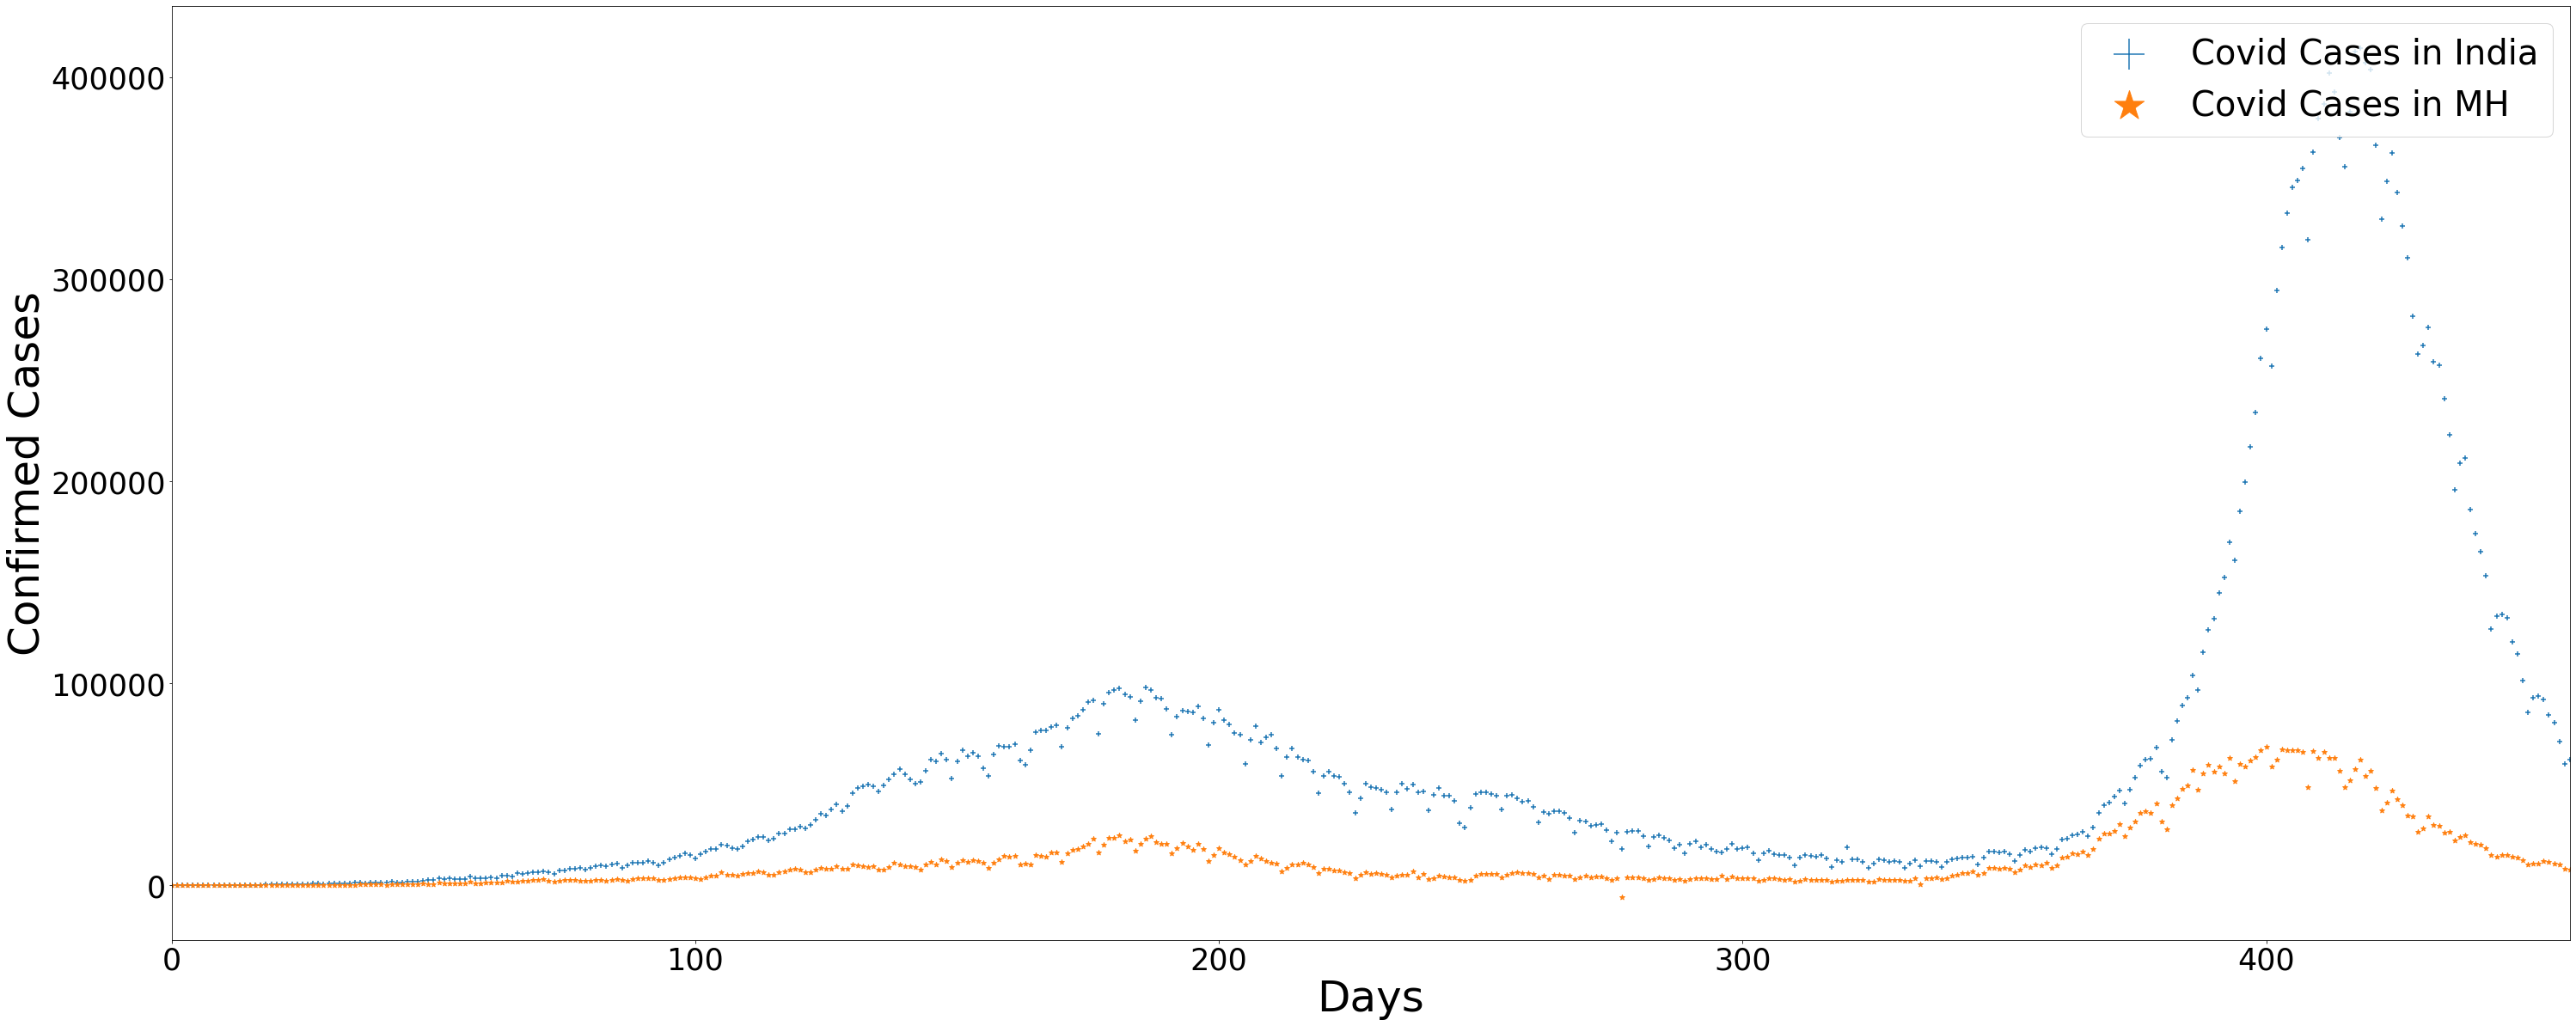

In [10]:
plt.scatter(days, confirmed[0], marker="+")
plt.scatter(days, confirmed[22], marker="*")
plt.xlabel("Days", fontsize = 50)
plt.ylabel("Confirmed Cases", fontsize = 50)
#plt.title("Confirmed Cases")
# increase graduation size
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)

fig = plt.gcf()
fig.set_size_inches(50, 20)
plt.margins(x=0)

plt.legend(["Covid Cases in India", "Covid Cases in MH"], loc = "upper right", fontsize = 40,  markerscale=6)
plt.show()

In [11]:
#ML Part starts
#X = no. of days since corona has arrived
#y = no. of cases

In [12]:
X=np.array(days)
y=confirmed[0]    #TT

In [13]:
X=X.reshape(int(val / 3), 1)
y=y.reshape(int(val/3), 1)

In [14]:
print("X: ", X.shape)
print("y: ", y.shape)

X:  (459, 1)
y:  (459, 1)


Training the Model

In [15]:
# from sklearn.metrics import r2_score

# arr = []
# max = 0
# for i in range(3, 120):
#   mymodel = np.poly1d(np.polyfit(X[:, 0], y[:, 0], i))
#   # print(r2_score(y, mymodel(X)))
#   arr.append(r2_score(y, mymodel(X)))

# arr

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


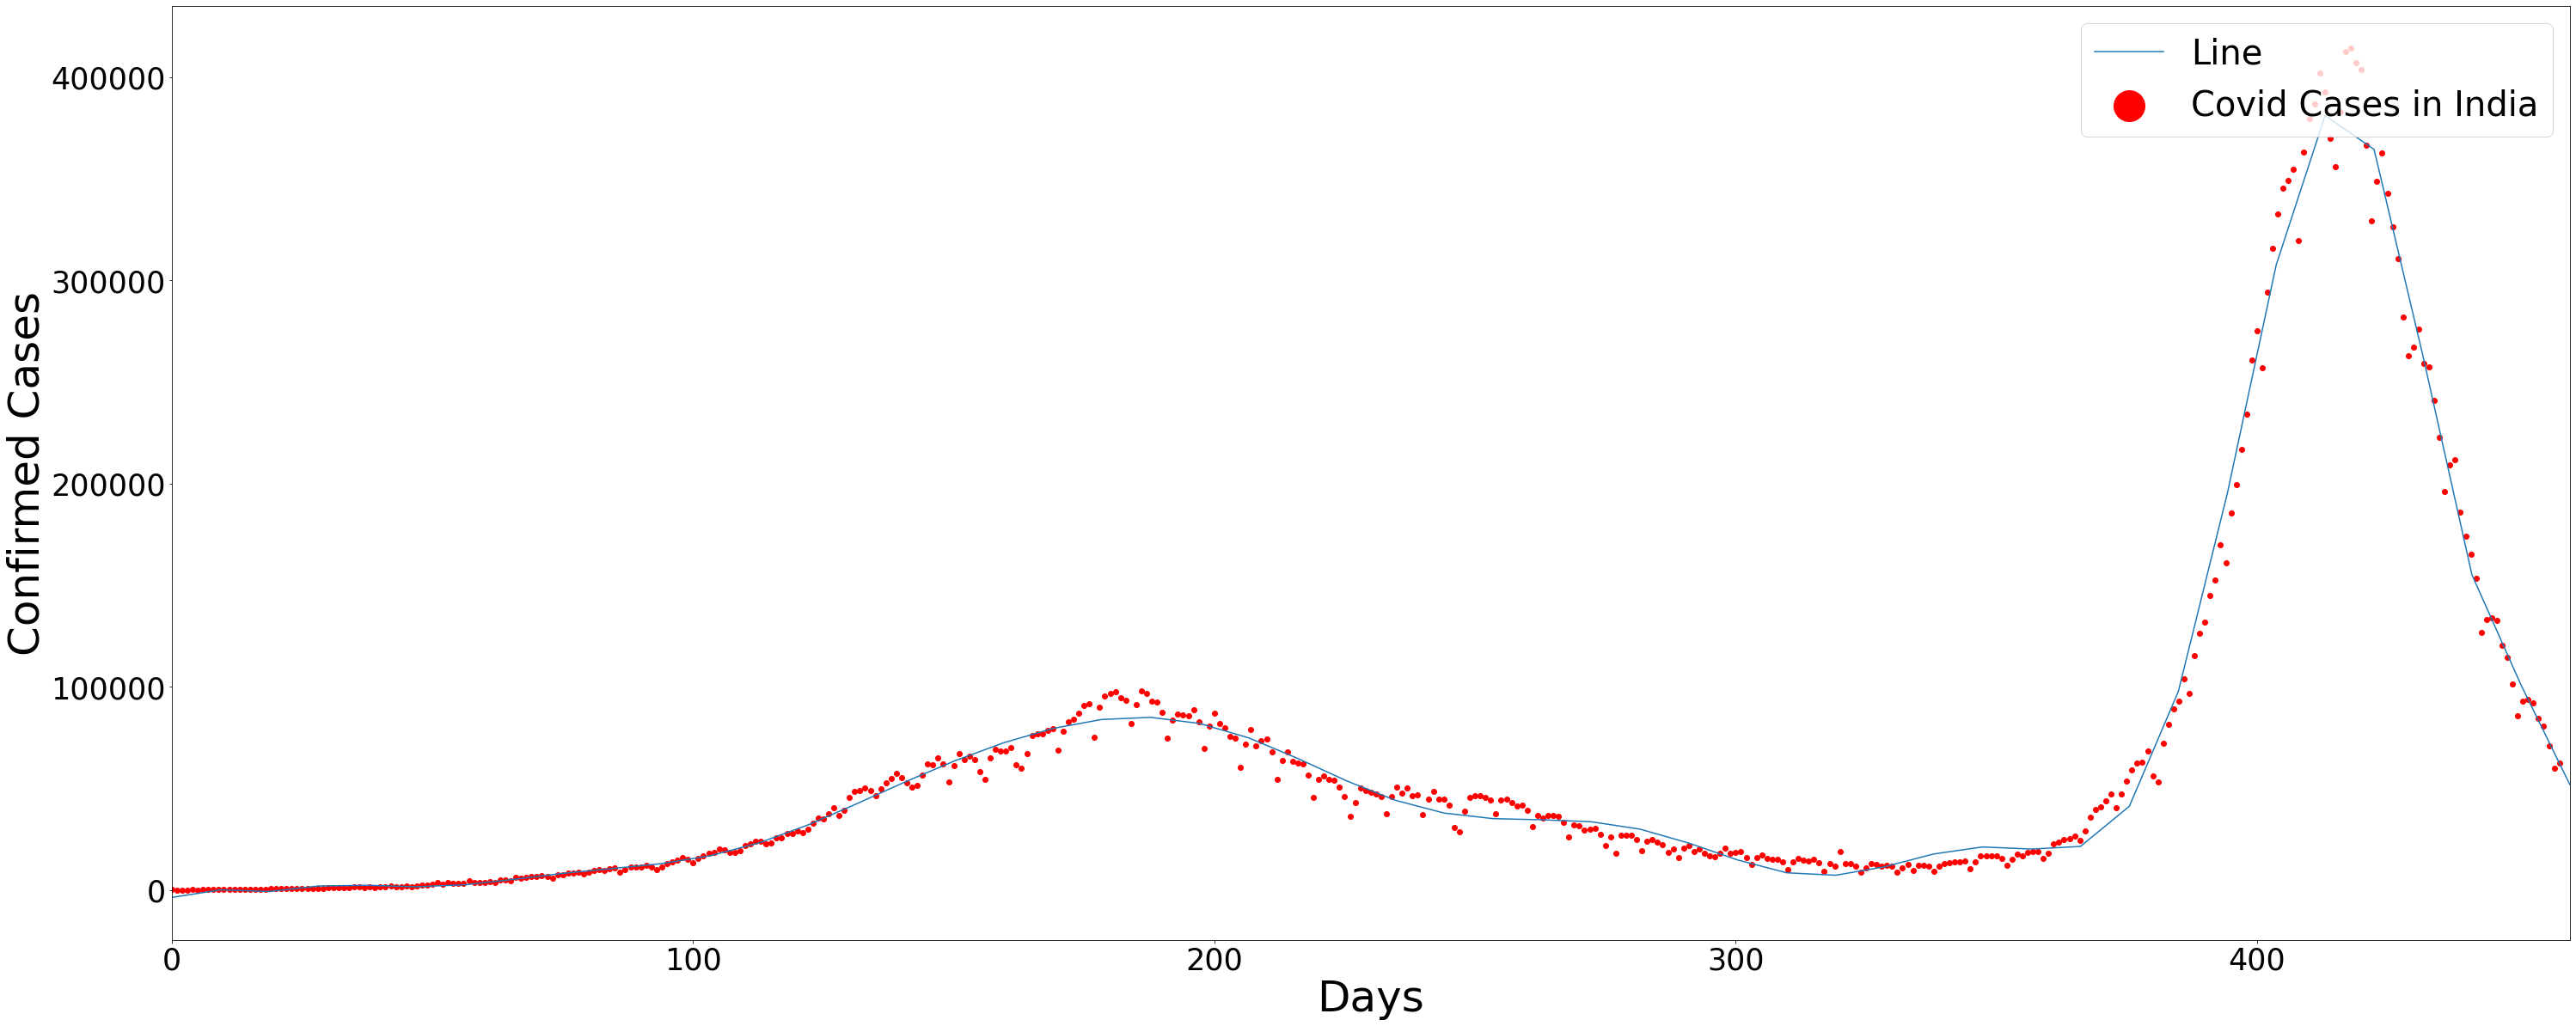

In [16]:
mymodel = np.poly1d(np.polyfit(X[:, 0], y[:, 0], 22))

# y_pred = np.zeros((40))
# z = [i for i in range(40)]
# z_arr = np.array(z)
# z_arr += 386

# for i in range(40):
#   y_pred[i] = mymodel(i+386)

line = np.linspace(0, 460)

plt.scatter(X[:, 0], y[:, 0], c = "red")
plt.plot(line, mymodel(line))
plt.xlabel("Days", fontsize = 50)
plt.ylabel("Confirmed Cases", fontsize = 50)

plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)

fig = plt.gcf()
fig.set_size_inches(50, 20)
plt.margins(x=0)

plt.legend(["Line", "Covid Cases in India"], loc = "upper right", fontsize = 40,  markerscale=6)
# plt.scatter(z_arr, y_pred)

plt.show()

In [17]:
confirmed[0][434]

240897.0

In [18]:
mymodel(434)

234749.82623229368

In [19]:
# To find the difference between the model and the actual data for the same day, put the same numbers
conf_new=mymodel(434)
conf_new1= conf_new - confirmed[0][434]           
conf_new1

-6147.173767706321

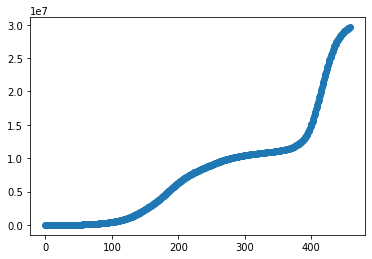

In [20]:
#Considering cumulative cases
cumu_cases = []
prev = 0

for i in range(y.shape[0]):
  prev = prev + y[i][0] 
  cumu_cases.append(prev)

plt.scatter(days, cumu_cases)

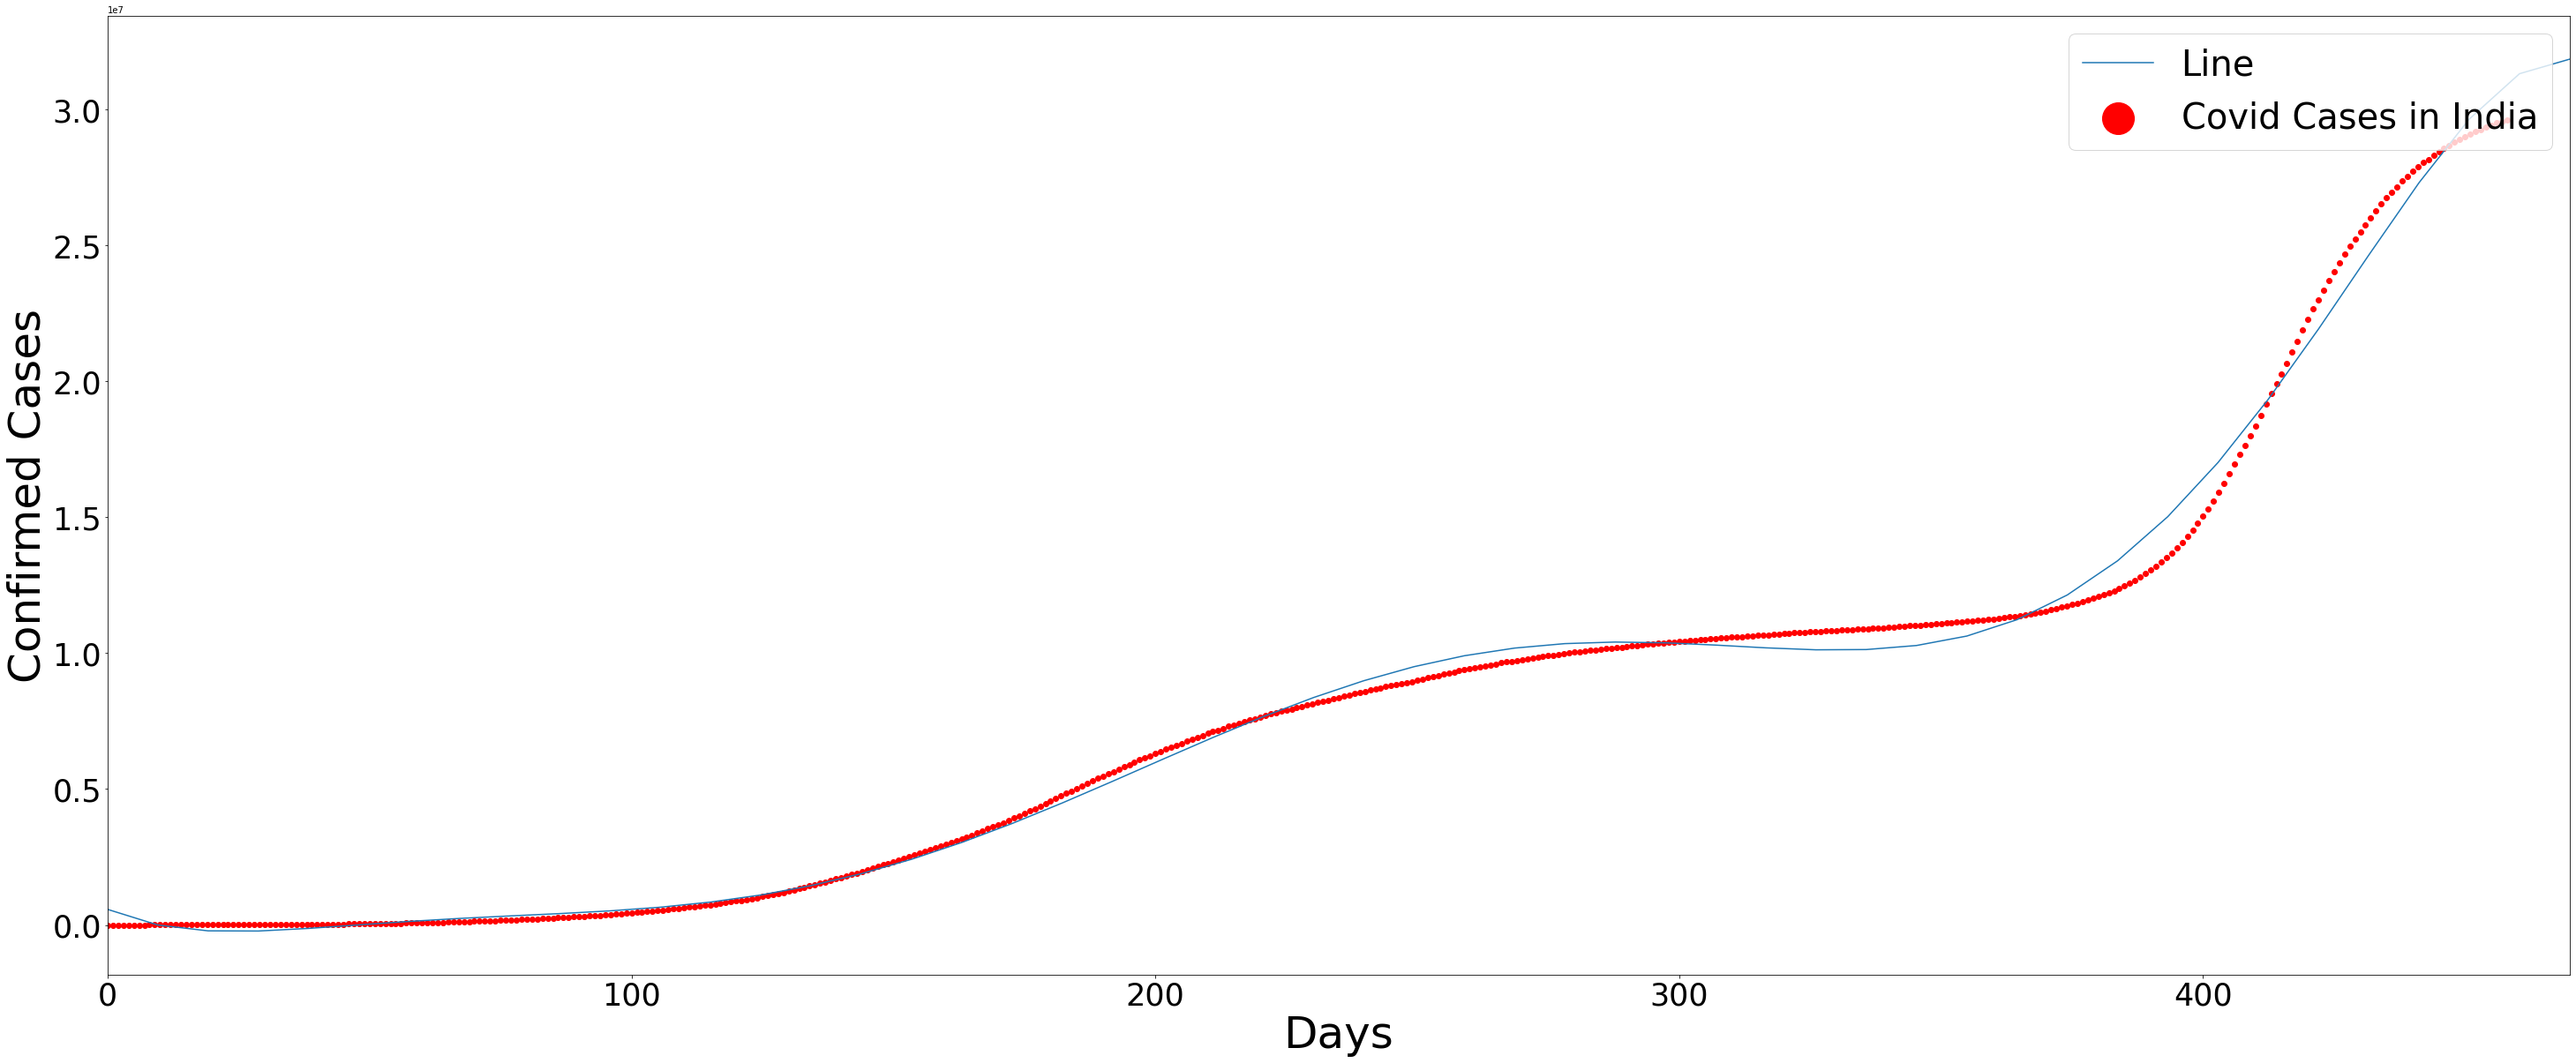

In [39]:
mymodel = np.poly1d(np.polyfit(days, cumu_cases, 7))
line = np.linspace(0, 470)
plt.scatter(days, cumu_cases, c = "red")
plt.plot(line, mymodel(line))
plt.xlabel("Days", fontsize = 50)
plt.ylabel("Confirmed Cases", fontsize = 50)

plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)

fig = plt.gcf()
fig.set_size_inches(50, 20)
plt.margins(x=0)

plt.legend(["Line", "Covid Cases in India"], loc = "upper right", fontsize = 40,  markerscale=6)


plt.show()

In [22]:
confirmed[0][434]

240897.0

In [23]:
mymodel(43)

27542.661873743986

In [24]:
conf_new=mymodel(434)
conf_new1= conf_new - cumu_cases[434]           
conf_new1

-671469.2949374467

In [25]:
c_new=mymodel(434) - mymodel(433)
c_new

290064.3643175736

In [26]:
# mymodel_mh = np.poly1d(np.polyfit(days, confirmed[22], 8))

# line = np.linspace(0, 450)

# plt.scatter(days, confirmed[22], c = "red")
# plt.plot(line, mymodel(line))
# plt.xlabel("Days", fontsize = 50)
# plt.ylabel("Confirmed Cases", fontsize = 50)

# plt.xticks(fontsize = 35)
# plt.yticks(fontsize = 35)

# fig = plt.gcf()
# fig.set_size_inches(50, 20)
# plt.margins(x=0)

# plt.legend(["Line", "Covid Cases in Maharashtra"], loc = "upper right", fontsize = 40,  markerscale=6)
# # plt.scatter(z_arr, y_pred)

# plt.show()

In [27]:
# import pandas.util.testing as tm
# from statsmodels.tsa.arima_model import ARIMA

In [28]:
# model=ARIMA(confirmed[0], order=(1,1,1))
# m_fit=model.fit()


In [29]:
# print(m_fit.summary())

In [30]:
confirmed[22][434]

26133.0

In [31]:
mymodel_mh = np.poly1d(np.polyfit(days, confirmed[22], 8))

line = np.linspace(0, 450)

plt.show()

In [32]:
mymodel_mh(434)

37961.83135620399

In [33]:
pred_arr = []
curr_day = val / 3

for i in range(38):
  my_model = np.poly1d(np.polyfit(days, confirmed[i], 22))
  pred_arr_state = []
  pred_arr_state.append(my_model(curr_day))
  pred_arr_state.append(my_model(curr_day + 1))
  pred_arr_state.append(my_model(curr_day + 2))
  # pred_arr_state.append(my_model(curr_day + 3))
  # pred_arr_state.append(my_model(curr_day + 4))

  pred_arr.append(pred_arr_state)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly co

In [34]:
for i in range(38):
  print(state_index_dict[i], ": " , pred_arr[i])

TT :  [53701.91425399384, 51827.42612219461, 54170.95763962277]
AN :  [32.06435708972622, 52.81394828002937, 85.104605520122]
AP :  [3148.767134454844, 812.7167377094795, -2408.497700473492]
AR :  [387.65695055799506, 483.97356615318944, 620.768855801935]
AS :  [3104.014722938751, 2898.4288184472916, 2580.8097091546133]
BR :  [1334.471470271048, 2766.166560880507, 5132.1433642010825]
CH :  [-182.788237061217, -384.24582506884275, -667.8502546681829]
CT :  [2699.660586901856, 4878.18880117488, 8145.741842659241]
DN :  [82.61461423250609, 166.92278562650947, 293.13478640556644]
DD :  [0.0, 0.0, 0.0]
DL :  [3566.8907336582165, 7675.553407686792, 14062.07743973888]
GA :  [-132.386876759256, -471.3400329474616, -910.9984500436384]
GJ :  [775.3554984362197, 1559.9638647271036, 2910.671965679069]
HR :  [-2761.3007151322054, -5193.752284705354, -8493.988603515496]
HP :  [-1226.447879525564, -2640.927302264086, -4662.248434866563]
JK :  [-185.49082886647818, -948.942880030479, -2017.11796047689

In [35]:
# import pickle

In [36]:
# pickle.dump(mymodel, open('covid_prediction.pkl','wb'))
# covid_prediction = pickle.load(open('covid_prediction.pkl','rb'))